**Installing Required Packages**

In [ ]:
pip install mysql-connector           #Only if required

 **Importing the requried libraries**

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Connection to the Database**


In [3]:
conn = mysql.connector.connect(host='localhost', user='root', password='12345678',
                              database='covid',
                              auth_plugin = 'mysql_native_password'
                              )


**Retrieving the Number of vaccines and Department Id from the database**

In [4]:
query = pd.read_sql("Select no_of_vaccines, slot_id from vaccine_slot", conn)
query = pd.DataFrame(query)
query = query.sort_values(by=['no_of_vaccines', 'slot_id'], ascending = False).head(20)


**Plotting the top 20 sites which has the highest slots available**

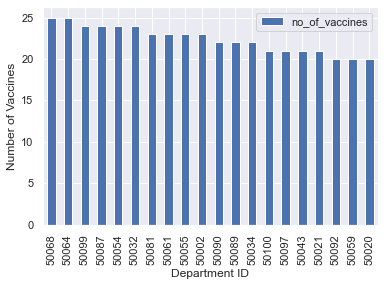

In [5]:
query.plot(kind="bar", x="slot_id", y="no_of_vaccines", xlabel = "Department ID", ylabel = "Number of Vaccines")
plt.show()

In [ ]:
**Number of patients every worker has administered**

In [7]:
query2 = pd.read_sql("select count(worker.w_id) as No_of_patients, worker.w_id as Worker_ID from patient p join administered_by on p.p_id = administered_by.p_id join worker on worker.w_id = administered_by.w_id group by worker.w_id;", conn)

query2 = pd.DataFrame(query2)
query2 = query2.sort_values(by=['No_of_patients', 'Worker_ID'], ascending = False).sample(20)
query2

,No_of_patients,Worker_ID
137,3,40139
235,3,40237
140,4,40142
58,2,40059
236,5,40238
188,4,40190
70,8,40071
118,4,40120
61,3,40062
66,6,40067


**Plotting the Number of patients worker has administered**

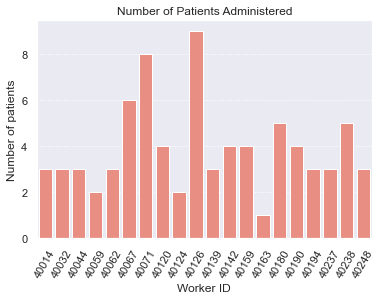

In [11]:
# Creating a bar plot with seaborn

sns.set()

sns.barplot(
    x='Worker_ID', 
    y='No_of_patients', 
    color='salmon', 
    data= query2
)
# Again, Matplotlib style formatting commands are used
# to customise the output details.
plt.xticks(rotation=60)
plt.ylabel("Number of patients")
plt.xlabel("Worker ID")
plt.title("Number of Patients Administered")
plt.gca().yaxis.grid(linestyle=':')

In [18]:
query3 = pd.read_sql("Select  count(Manufacturer_Name) as Number_of_Distributors,Manufacturer_Name from manufacturers m join sells_to on m.m_id = sells_to.m_id join distributor d on d.d_id = sells_to.d_id group by Manufacturer_Name;", conn)

query3 = pd.DataFrame(query3)

query3


,Number_of_Distributors,Manufacturer_Name
0,5,AstraZeneca
1,2,Sputnik V
2,2,Moderna
3,5,Janssen
4,7,Covidsheild
5,9,Pfizer
6,6,Covaxin
7,8,CoronaVac
8,6,Convidecia


**Vaccine distribution**

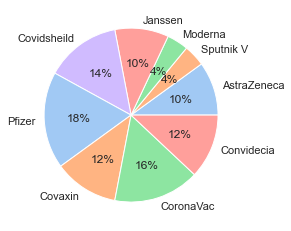

In [37]:
colors = sns.color_palette('pastel')[0:5]

plt.pie(query3.loc[:,'Number_of_Distributors'], labels = query3.loc[:,'Manufacturer_Name'] ,colors = colors, autopct='%.0f%%')
plt.show()